In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from pyvi import ViTokenizer
from sklearn.datasets import load_files
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, learning_curve
from sklearn.pipeline import Pipeline
%matplotlib inline

In [19]:
data_train = load_files(container_path = "data/news_1135/", encoding = "utf-8")

print(data_train.filenames[0:3])
print("Tong so file: {}" .format( len(data_train.filenames)))
print("Danh sách 10 nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names[0:10])])


['data/news_1135/Thể thao\\2e62de81ade8318f66cc740f5ede5607ea1bf002.txt'
 'data/news_1135/Thể thao\\f9bd156031140a7db52ae51de4561f234a0eb277.txt'
 'data/news_1135/Thể thao\\aeeb3b3b0dfc936de928f0b004259aca70aa4efa.txt']
Tong so file: 224
Danh sách 10 nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự')]


In [20]:
print(data_train.data[0])

Dân_trí Sáng 5/12 , giải quần_vợt các tay_vợt xuất_sắc Việt_Nam - Cúp Vietravel 2016 đã chính_thức khai_mạc tại TP Vinh - Nghệ_An . Tham_dự giải hơn 30 tay_vợt xuất_sắc nhất của Liên_đoàn quần_vợt Việt_Nam . Dự lễ khai_mạc có ông Nguyễn Trọng Hổ - Vụ_trưởng Vụ thể_thao thành_tích cao II ; Đoàn Quốc Cường - Trưởng bộ_môn quần_vợt Liên_đoàn quần_vợt Việt_Nam ; Nguyễn Quốc Kỳ - Tổng_Giám_đốc Viettravel , Phó_Chủ_tịch kiêm Tổng_thư_ký Liên_đoàn quần_vợt Việt_Nam cùng lãnh_đạo tỉnh Nghệ_An . Giải quần_vợt các cây_vợt xuất_sắc Việt_Nam - Cup Vietravel 2016 do Liên_đoàn Quần_vợt Việt_Nam VTF phối_hợp với Sở VH - TT - DL và Liên_đoàn quần_vợt Nghệ_An NTF tổ_chức ; là giải đấu chuyên_nghiệp quốc_gia lần đầu_tiên được tổ_chức tại Nghệ_An . Ông Nguyễn Quốc Kỳ - PCT kiêm TTK Liên_đoàn quần_vợt Việt_Nam Tham_gia giải lần này có 22 VĐV nam , 9 VĐV nữ có điểm xếp_hạng cao nhất của bộ_môn quần_vợt chuyên_nghiệp , đến từ các trung_tâm quần_vợt lớn trong cả nước như : Thành_phố Hồ Chí Minh ; Bình_Dương 

In [21]:
print(data_train.target[0])

5


In [22]:
with open("data/vietnamese-stopwords.txt", encoding = "utf-8") as f:
    stopwords = f.readlines()
stopwords = [x.strip().replace(" ", "_") for x in stopwords]
print(stopwords[:10])

['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']


In [23]:
module_count_vector = CountVectorizer(stop_words = stopwords)
model_rf_preprocess = Pipeline([('vect', module_count_vector), ('tfidf', TfidfTransformer())])

In [24]:
data_bow = module_count_vector.fit_transform(data_train.data, data_train.target)
data_tfidf = model_rf_preprocess.fit_transform(data_train.data, data_train.target)

In [48]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(data_bow, data_train.target, test_size = 0.2, random_state = 12)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(data_tfidf, data_train.target, test_size = 0.2, random_state = 12)

In [49]:
print(X_train_bow.shape, y_train_bow.shape)
print(X_test_bow.shape, y_test_bow.shape)

(179, 7972) (179,)
(45, 7972) (45,)


In [50]:
for i in range(5):
    print(data_train.target[i], data_train.target_names[i])

5 Giải trí
5 Khoa học - Công nghệ
5 Kinh tế
5 Pháp luật
5 Sức khỏe


In [51]:
mnb = MultinomialNB(alpha = 0.1)
mnb.fit(X_train_bow, y_train_bow)

,alpha,0.1
,force_alpha,True
,fit_prior,True
,class_prior,None


In [52]:
gnb = GaussianNB(var_smoothing = 1e-3)
gnb.fit(X_train_tfidf.toarray(), y_train_tfidf)

,priors,None
,var_smoothing,0.001


In [53]:
mnb_pred = mnb.predict(X_test_bow)
print(accuracy_score(y_test_bow, mnb_pred))

0.9777777777777777


In [54]:
gnb_pred = gnb.predict(X_test_tfidf.toarray())
print(accuracy_score(y_test_tfidf, gnb_pred))

0.9777777777777777


In [62]:
new_data = ViTokenizer.tokenize("Công Phượng ghi bàn cho đội tuyển Việt Nam")
new_input = module_count_vector.transform([new_data])
print(new_input)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (1, 7972)>
  Coords	Values
  (0, 1538)	1
  (0, 2177)	1
  (0, 4837)	1
  (0, 6947)	1
  (0, 7877)	1


In [64]:
print(gnb.predict(new_input.toarray()))

[5]


In [70]:
new_input_tfidf = model_rf_preprocess.transform([new_data])
print(new_input_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (1, 7972)>
  Coords	Values
  (0, 1538)	0.4289659824314794
  (0, 2177)	0.3618968093327106
  (0, 4837)	0.6860095516477843
  (0, 6947)	0.27964290889190035
  (0, 7877)	0.36906588011611363


In [71]:
print(mnb.predict(new_input_tfidf))

[5]


In [85]:
var_smoothings = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
acc = []

for i in var_smoothings:
    model_GNB = GaussianNB(var_smoothing = i)
    model_GNB.fit(X_train_tfidf.toarray(), y_train_tfidf)
    model_pred = model_GNB.predict(X_test_tfidf.toarray())
    acc.append(accuracy_score(y_test_tfidf, model_pred))
print(acc)

[0.8666666666666667, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556]


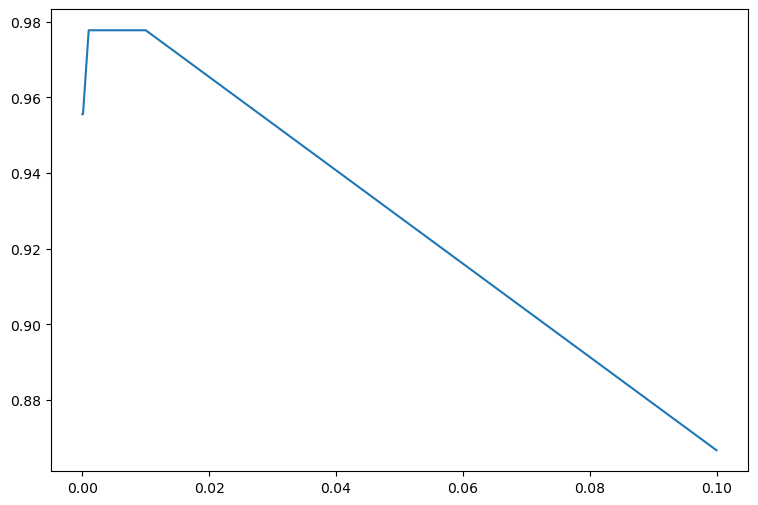

In [86]:
plt.figure(figsize = (9, 6))
plt.plot(var_smoothings, acc)